In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [2]:
df = pd.read_csv('/home/suhas/Desktop/office/Data Science/Notes/Data Analysis/Data/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.select_dtypes(exclude='number').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [10]:
X = df.drop(columns='charges')
y = df['charges']

In [11]:
num_cols = ['age', 'bmi', 'children',]
cat_cols = ['sex', 'smoker', 'region']

In [12]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [13]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

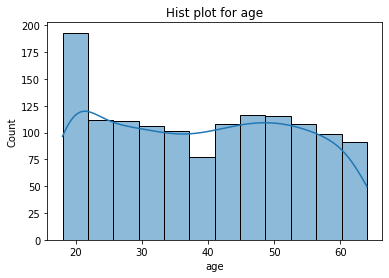

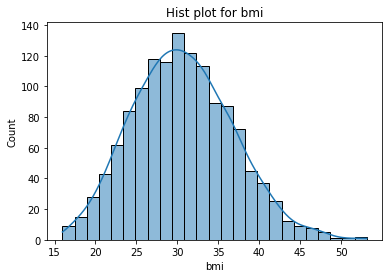

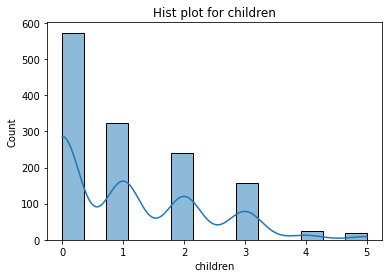

--------------------------------------------------


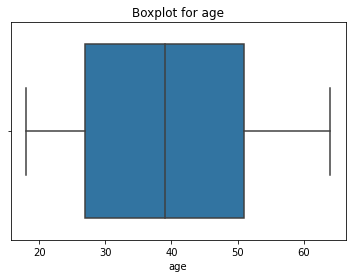

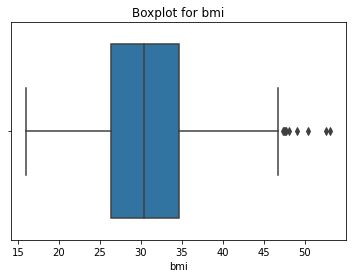

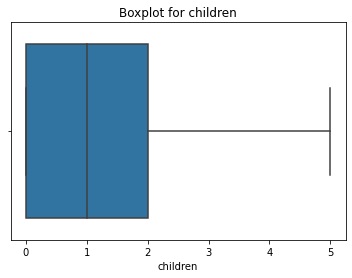

--------------------------------------------------


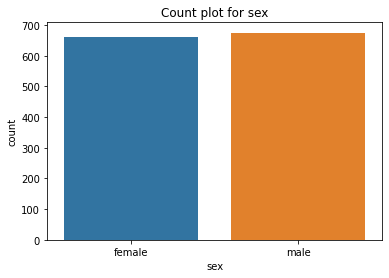

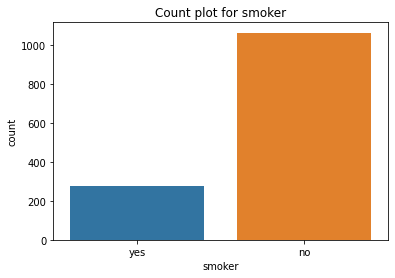

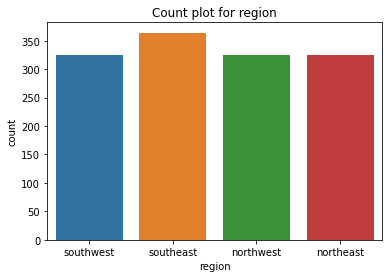

--------------------------------------------------


<AxesSubplot:xlabel='charges', ylabel='Count'>

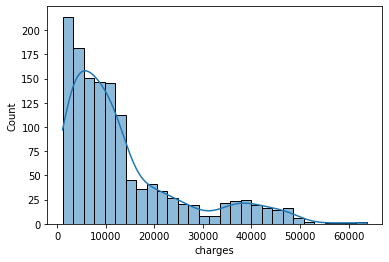

In [14]:
for col in num_cols:
    sns.histplot(data=X,x=col,kde=True)
    plt.title(f"Hist plot for {col}")
    plt.show()

print('-'*50)

for col in num_cols:
    sns.boxplot(data=X,x=col)
    plt.title(f"Boxplot for {col}")
    plt.show()

print('-'*50)

for col in cat_cols:
    sns.countplot(data=X,x=col)
    plt.title(f"Count plot for {col}")
    plt.show()
print('-'*50)

sns.histplot(df['charges'],kde=True)

In [15]:
from sklearn.preprocessing import FunctionTransformer

trans = FunctionTransformer(np.log1p)

y = trans.fit_transform(y)

In [16]:
y

0        9.734236
1        7.453882
2        8.400763
3        9.998137
4        8.260455
          ...    
1333     9.268755
1334     7.699381
1335     7.396847
1336     7.605365
1337    10.279948
Name: charges, Length: 1337, dtype: float64

## Feature Selection

In [17]:
from scipy.stats import spearmanr

significant_num_cols = {}
for col in num_cols:
    corr,p_value = spearmanr(X[col],y)

    if p_value < 0.05:
        significant_num_cols[col] = {
            'corr':corr,
            'p_value': p_value
        }

    print(f"{col}:{corr:.3f},p_value:{p_value:.3f}")

print(significant_num_cols.keys())

    

age:0.534,p_value:0.000
bmi:0.120,p_value:0.000
children:0.132,p_value:0.000
dict_keys(['age', 'bmi', 'children'])


In [18]:
from scipy.stats import kruskal

significant_cat_cols = {}
for col in cat_cols:
    groups = [y[X[col] == cat] for cat in X[col].unique()]
    stat,p_value = kruskal(*groups)

    if p_value < 0.05:
        significant_cat_cols[col] = {
            'stat':stat,
            'p_value':p_value
        }
    print(f"{col}:{stat:.3f},p_value:{p_value}")

print(significant_cat_cols.keys())

sex:0.154,p_value:0.6944270674790718
smoker:588.347,p_value:5.734773588751665e-130
region:4.623,p_value:0.20161983372311595
dict_keys(['smoker'])


In [19]:
update_cat = ['smoker']

X = X[num_cols + update_cat]

In [20]:
X

,age,bmi,children,smoker
0,19,27.900,0,yes
1,18,33.770,1,no
2,28,33.000,3,no
3,33,22.705,0,no
4,32,28.880,0,no
...,...,...,...,...
1333,50,30.970,3,no
1334,18,31.920,0,no
1335,18,36.850,0,no
1336,21,25.800,0,no


In [21]:
y

0        9.734236
1        7.453882
2        8.400763
3        9.998137
4        8.260455
          ...    
1333     9.268755
1334     7.699381
1335     7.396847
1336     7.605365
1337    10.279948
Name: charges, Length: 1337, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import OneHotEncoder,RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
num_pipeline = Pipeline([
    ('roboust',RobustScaler()),
    ('impute',SimpleImputer(strategy='median'))
])

cat_pipeline = Pipeline([
    ('ohe',OneHotEncoder(drop='first',sparse=False))
])

In [24]:
preprocess_pipeline = ColumnTransformer([
    ('num_pipe',num_pipeline,num_cols),
    ('cat_pipe',cat_pipeline,update_cat)
])

In [25]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import joblib

algorithms = {
    '2random_forest': RandomForestRegressor(),
    '2decision_tree': DecisionTreeRegressor(),
    '2adb':AdaBoostRegressor(),
    '2gdb': GradientBoostingRegressor(),
    '2svr': SVR(),
    '2lg':LinearRegression(),
    '2knn': KNeighborsRegressor(),
    '2xgb': xgb.XGBRegressor()
}


for name,algo in algorithms.items():
    model = Pipeline([
        ('pipeline',preprocess_pipeline),
        ('name',algo)

    ])

    model.fit(X_test,y_test)

    joblib.dump(model,f"{name}.pkl")

    

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    cv = cross_val_score(model,X,y,scoring='r2',cv=5)
    cv_mean = cv.mean()

    print(f"{name}")
    print(f"R2 Score:{r2}")
    print(f"MSE:{mse}")
    print(f"MAE:{mae}")
    print(f"CV:{cv}")
    print(f"CV Mean:{cv_mean}")
    print('-'*50)
    






    

2random_forest
R2 Score:0.9755823014933847
MSE:0.022656887424309338
MAE:0.08485900472109073
CV:[0.80112668 0.68630858 0.82744055 0.79910924 0.77049199]
CV Mean:0.7768954075097376
--------------------------------------------------
2decision_tree
R2 Score:1.0
MSE:0.0
MAE:0.0
CV:[0.61676402 0.54202729 0.60338581 0.68464972 0.68630043]
CV Mean:0.6266254522584073
--------------------------------------------------
2adb
R2 Score:0.853112502934887
MSE:0.13629513379982122
MAE:0.289606003287542
CV:[0.73904711 0.71991207 0.75994287 0.76815792 0.75040977]
CV Mean:0.7474939493088248
--------------------------------------------------
2gdb
R2 Score:0.9571631171762033
MSE:0.03974782600760456
MAE:0.11620778817213588
CV:[0.86839158 0.73323223 0.89057937 0.83649947 0.80302362]
CV Mean:0.8263452533831492
--------------------------------------------------
2svr
R2 Score:0.8772613619467651
MSE:0.11388769929450096
MAE:0.1656423548663339
CV:[0.88821207 0.71865555 0.8966264  0.8193814  0.78200087]
CV Mean:0.820

## Prediction

In [26]:
X_train.columns

Index(['age', 'bmi', 'children', 'smoker'], dtype='object')

In [27]:
import numpy as np
import pandas as pd
import joblib

model = joblib.load('2xgb.pkl')

df = {
    "age": [40],
    "bmi": [44],
    "children": [2],
    "smoker": ["yes"]

}

new_df= pd.DataFrame(df)

predict_df = model.predict(new_df)

log_trans = np.expm1(predict_df)

print(log_trans[0])

44862.938
